In [24]:
from ontology_manager.ontology_utils import OntologyManager # loading the DOME 4.0 Ontology Manager Package
from rdflib import Graph, URIRef, Namespace, Literal, BNode, collection
from rdflib.namespace import SKOS, RDF, RDFS, OWL
from datetime import date

In [25]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph, rdflib_to_graphtool
import networkx as nx
import matplotlib.pyplot as plt

In [26]:
from ontodot.ontodot import vis, random_date_time, auto_bind_namespaces, printH, generate_uuid, generate_random_materialproject_id
from ontodot.ontodot import OntoVis

In [27]:
from types import SimpleNamespace # We use simple name spaces, it is a basis for the new SimPhpNy Future
import os, random

In [28]:
nasicon=SimpleNamespace() # create a simple namespace as a lightweight session !

# Load the ontology 

In [29]:
nasicon.g=Graph(bind_namespaces="rdflib")  # We are using RDFLIB directly, without any wrappers on top of it for efficiency.
nasicon.ns=Namespace('http://www.ddmd.io/mio/')  # check later
nasicon.path = "/home/adham/projects/Nasicon_Ontology"
nasicon.file='mio.ttl'

In [30]:
nasicon.g.parse(os.path.join(nasicon.path, nasicon.file))

<Graph identifier=N3e1a1396d26d408e989c6fc17d97ec29 (<class 'rdflib.graph.Graph'>)>

# Visualise

### *We will be available in enhanced - interactive/modern form - on the front end with final release*

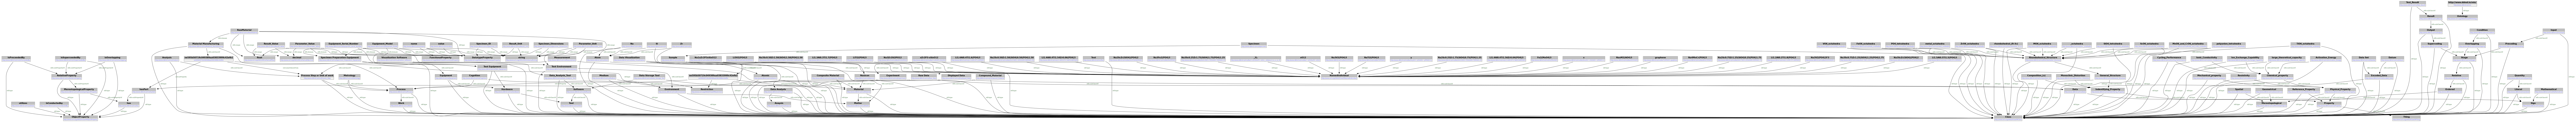

In [31]:
vis(nasicon.g)

In [32]:
ovis=OntoVis(nasicon.g)


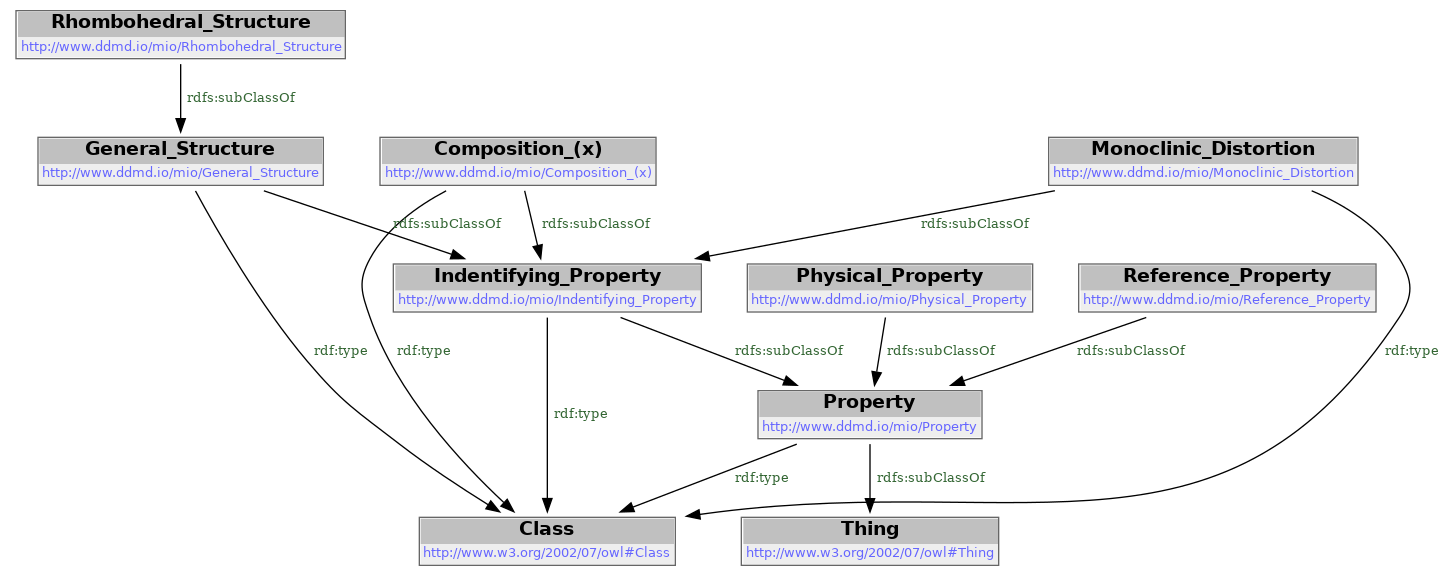

In [33]:
vis(ovis.zoom_in(URIRef("http://www.ddmd.io/mio/Monoclinic_Distortion"), 4)) # zoom in,up to distance of 2. 

# define prefixes (binds) of other ontology as needed. 

In [34]:
# these are bindings (RDFLIB) 
binds="""
@prefix domeES: <http://dome40.eu/semantics/dome4.0_core#> .
@prefix mio: <http://www.ddmd.io/mio/> .
@prefix dcat: <http://www.w3.org/ns/dcat#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix euroscivoc: <http://data.europa.eu/8mn/euroscivoc/> .
@prefix evmpo: <https://emmc.eu/semantics/evmpo/evmpo.ttl#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix http-meth: <http://www.w3.org/2011/http-methods#> .
@prefix msm: <http://iserve.kmi.open.ac.uk/ns/msm#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .
@prefix xs: <http://www.w3.org/2001/XMLSchema#> .
"""


In [13]:
nsbinds=auto_bind_namespaces(nasicon.g, binds)

g.bind(domeES, http://dome40.eu/semantics/dome4.0_core#)
g.bind(mio, http://www.ddmd.io/mio/)
g.bind(dcat, http://www.w3.org/ns/dcat#)
g.bind(dcterms, http://purl.org/dc/terms/)
g.bind(euroscivoc, http://data.europa.eu/8mn/euroscivoc/)
g.bind(evmpo, https://emmc.eu/semantics/evmpo/evmpo.ttl#)
g.bind(foaf, http://xmlns.com/foaf/0.1/)
g.bind(http-meth, http://www.w3.org/2011/http-methods#)
g.bind(msm, http://iserve.kmi.open.ac.uk/ns/msm#)
g.bind(owl, http://www.w3.org/2002/07/owl#)
g.bind(rdf, http://www.w3.org/1999/02/22-rdf-syntax-ns#)
g.bind(rdfs, http://www.w3.org/2000/01/rdf-schema#)
g.bind(skos, http://www.w3.org/2004/02/skos/core#)
g.bind(xs, http://www.w3.org/2001/XMLSchema#)


In [15]:
print(nsbinds)

{'domeES': Namespace('http://dome40.eu/semantics/dome4.0_core#'), 'mio': Namespace('http://www.ddmd.io/mio/'), 'dcat': Namespace('http://www.w3.org/ns/dcat#'), 'dcterms': Namespace('http://purl.org/dc/terms/'), 'euroscivoc': Namespace('http://data.europa.eu/8mn/euroscivoc/'), 'evmpo': Namespace('https://emmc.eu/semantics/evmpo/evmpo.ttl#'), 'foaf': Namespace('http://xmlns.com/foaf/0.1/'), 'http-meth': Namespace('http://www.w3.org/2011/http-methods#'), 'msm': Namespace('http://iserve.kmi.open.ac.uk/ns/msm#'), 'owl': Namespace('http://www.w3.org/2002/07/owl#'), 'rdf': Namespace('http://www.w3.org/1999/02/22-rdf-syntax-ns#'), 'rdfs': Namespace('http://www.w3.org/2000/01/rdf-schema#'), 'skos': Namespace('http://www.w3.org/2004/02/skos/core#'), 'xs': Namespace('http://www.w3.org/2001/XMLSchema#')}


Creating a graph to contain some individuals, then we can add these to the ontology

We use the terminology of SimPhoNy, i.e, a CUDS is a Common Universal Data Structure, but you can choose any name you like. \

In [16]:
cuds=SimpleNamespace() 
cuds.g=Graph()
cuds_collection=set()

In [18]:
mioNS=nsbinds['mio']
print(mioNS)

http://www.ddmd.io/mio/


In [19]:
# lets create an instance (individual) of a Nasicon material #
cuds.nasicon = URIRef(f"{mioNS}Nasicon1")

In [20]:
print(cuds)

namespace(g=<Graph identifier=N24776793414c4f33bf36f6aebb4ca702 (<class 'rdflib.graph.Graph'>)>, nasicon=rdflib.term.URIRef('http://www.ddmd.io/mio/Nasicon1'))


In [23]:
cuds.g.add((cuds.nasicon, RDF.type, mioNS.Nasicon))

<Graph identifier=N24776793414c4f33bf36f6aebb4ca702 (<class 'rdflib.graph.Graph'>)>

Challenge: 

create additional object properties to this Nasicon!


# CHALLENGE: Adapt this to mio! 

inspect_iri=URIRef("http://dome40.eu/semantics/dome4.0_core#DS_2")
q="""
SELECT ?predicate ?object
WHERE {
    <http://dome40.eu/semantics/dome4.0_core#DS_2> ?predicate ?object .
}
"""
DS99 = Graph()
r=gc.query(q)
for i in r:
    DS99.add((inspect_iri, i.predicate, i.object))
    q2 = f"""
    SELECT ?predicate ?object
    WHERE {{
        <{i.object}> ?predicate ?object .
    }}
    """
    r2 = gc.query(q2)
    for j in r2:
        DS99.add((j.object, j.predicate, j.object))
        print(j.object, j.predicate, j.object)